In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('US_Accidents_Dec21_updated.csv')

In [4]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [6]:
df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

In [10]:
missing_percentages = df.isna().sum().sort_values(ascending = False)/len(df)
missing_percentages
#sort out the ones with zeroes
missing_percentages[missing_percentages != 0]

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
dtype: float64

<Axes: >

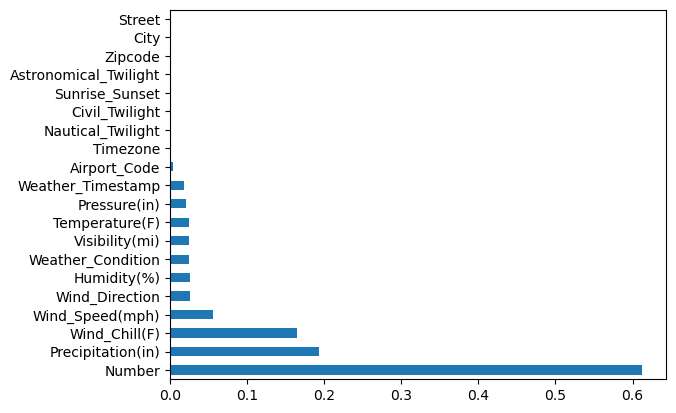

In [14]:
missing_percentages[missing_percentages != 0].plot(kind = 'barh')

# State
The column lists down the name of the US state found in the address of the accident. We want to see the top 10 states by the number of accidents.

In [15]:
df.State

0          OH
1          OH
2          OH
3          OH
4          OH
           ..
2845337    CA
2845338    CA
2845339    CA
2845340    CA
2845341    CA
Name: State, Length: 2845342, dtype: object

In [16]:
states_by_accident = df.State.value_counts()
states_by_accident[:10]

CA    795868
FL    401388
TX    149037
OR    126341
VA    113535
NY    108049
PA     99975
MN     97185
NC     91362
SC     89216
Name: State, dtype: int64

<Axes: >

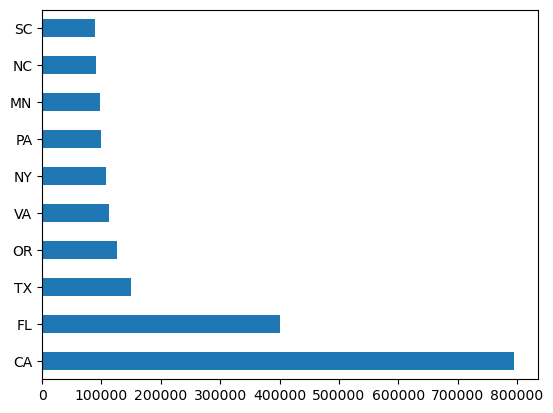

In [18]:
states_by_accident[:10].plot(kind = 'barh')

# City
The column lists the name of the city in the address record. Let us now check how many cities of the top ten states above feature in the top 30 cities by accidents.

In [37]:
#pull out the column
df.City  

#look at the unique values of the column

cities = df.City.unique()
len(cities)

11682

In [24]:
cities_by_accident = df.City.value_counts()
cities_by_accident

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

The top cities include Los Angeles, Houston, Dallas, Miami, etc. Let’s visualize the top 30 cities and see how many belong to the top ten states.

<Axes: >

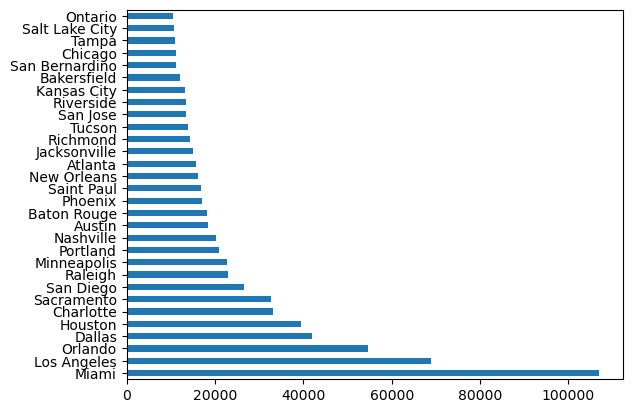

In [26]:
cities_by_accident[:30].plot(kind = 'barh')

# How would the distribution of cities by the number of accidents look like?

<Axes: xlabel='City', ylabel='Count'>

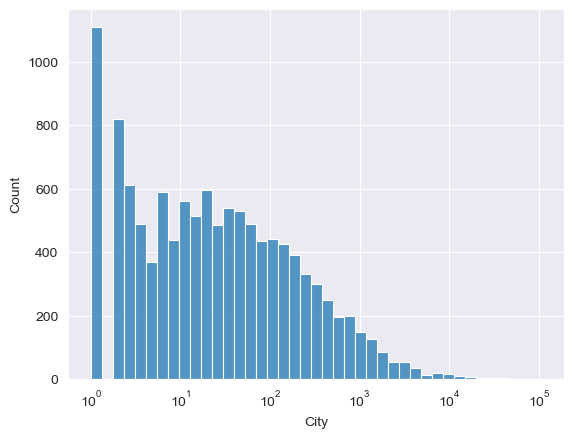

In [27]:
import seaborn as sns
sns.set_style("darkgrid")
#plotting a hitogram with a logarithmic scale
sns.histplot(cities_by_accident, log_scale=True)

# High accident cities where the number of accidents is greater and equal to 1000

In [30]:
high_accident_cities = cities_by_accident[cities_by_accident >= 1000]
high_accident_cities 


Miami          106966
Los Angeles     68956
Orlando         54691
Dallas          41979
Houston         39448
                ...  
Tualatin         1001
Utica            1001
Los Banos        1001
Mankato          1000
Chiloquin        1000
Name: City, Length: 496, dtype: int64

# Low accident cities where the number is less than 1000.

In [31]:
low_accident_cities = cities_by_accident[cities_by_accident < 1000]
low_accident_cities

Osseo                           997
Madras                          997
Manor                           992
Portsmouth                      988
Schenectady                     985
                               ... 
Ridgedale                         1
Sekiu                             1
Wooldridge                        1
Bullock                           1
American Fork-Pleasant Grove      1
Name: City, Length: 11185, dtype: int64

# What is the percentage of high accident cities?

In [38]:
len(high_accident_cities)/len(cities)


0.04245848313644924

4.35% of the total number of cities have an accident number greater than 1000.

# The distribution of high accident cities look as-

<Axes: xlabel='City', ylabel='Count'>

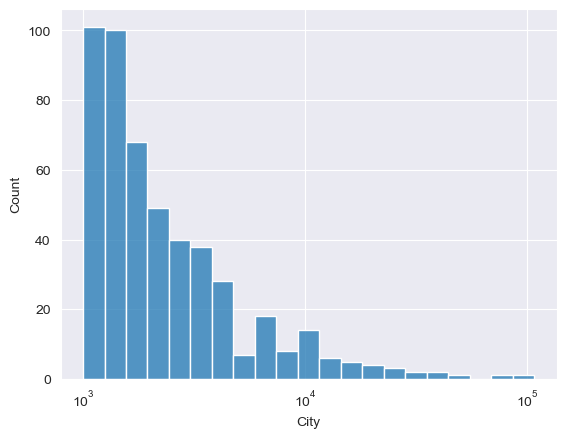

In [39]:
sns.histplot(high_accident_cities, log_scale = True) 

<Axes: xlabel='City', ylabel='Count'>

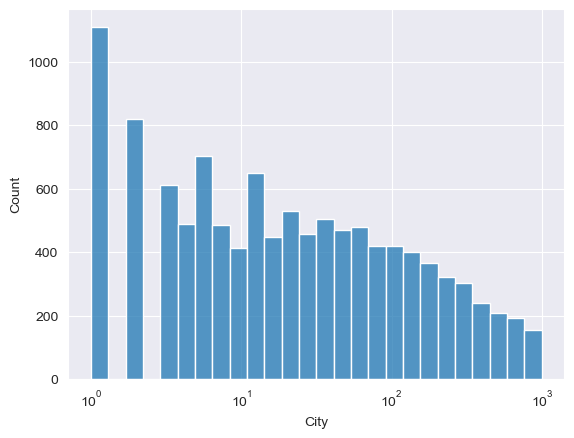

In [41]:
sns.histplot(low_accident_cities, log_scale = True)

Over 1000 cities have had just one accident in 4years- needs further investigation.

The majority of them have witnessed between 10–100 accidents during the period.

Accidents by cities follow an exponentially decreasing distribution.

# Start Time
This column records the start time of the accident in the local time zone.

In [42]:
#pull the column from the data
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

In [43]:
#convert to timestamp type and override the original column
df.Start_Time = pd.to_datetime(df.Start_Time)

We want to know what time of the day witnesses more accidents.

In [44]:
#extract hour from timestamp
df.Start_Time.dt.hour

0           0
1           5
2           6
3           6
4           7
           ..
2845337    18
2845338    19
2845339    19
2845340    19
2845341    18
Name: Start_Time, Length: 2845342, dtype: int64

Now, we plot the distribution-

C:\Users\HP\AppData\Local\Temp\ipykernel_10428\1705024698.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Start_Time.dt.hour, bins = 24, kde=False, norm_hist=True)


<Axes: xlabel='Start_Time'>

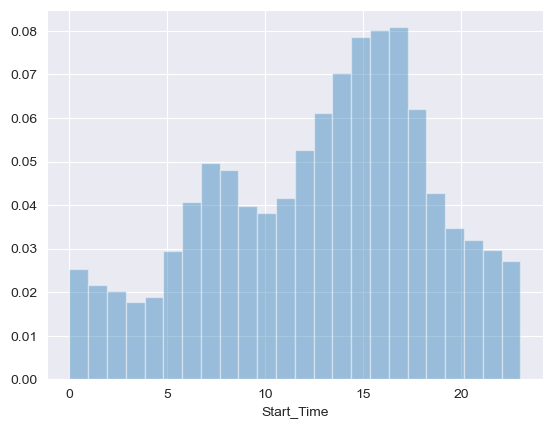

In [46]:
sns.distplot(df.Start_Time.dt.hour, bins = 24, kde=False, norm_hist=True)

There are two peaks of time- one in the morning in between 6 am to 9 am and another between 3 pm and 6 pm. This is consistent with the assumption that rush hours in the morning and evening could lead to more accidents.

Does this trend apply on weekends too? Let us do a Monday and Sunday comparison.

C:\Users\HP\AppData\Local\Temp\ipykernel_10428\3176570514.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(monday_start_time.dt.hour, bins = 24, kde=False, norm_hist=True)


<Axes: xlabel='Start_Time'>

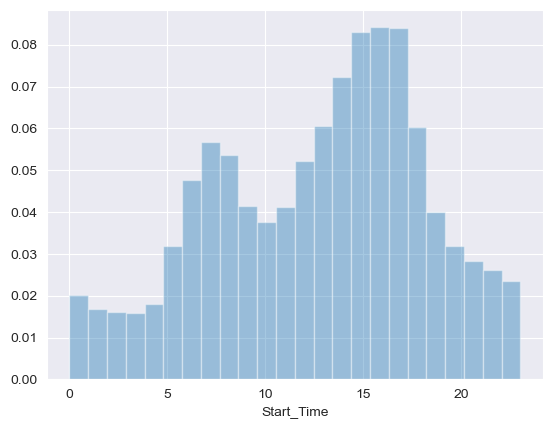

In [47]:
#pull the day of the week from the timestamp format
monday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 0]
#plot the distribution
sns.distplot(monday_start_time.dt.hour, bins = 24, kde=False, norm_hist=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_10428\1369835080.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sundays_start_time.dt.hour, bins = 24, kde=False, norm_hist=True)


<Axes: xlabel='Start_Time'>

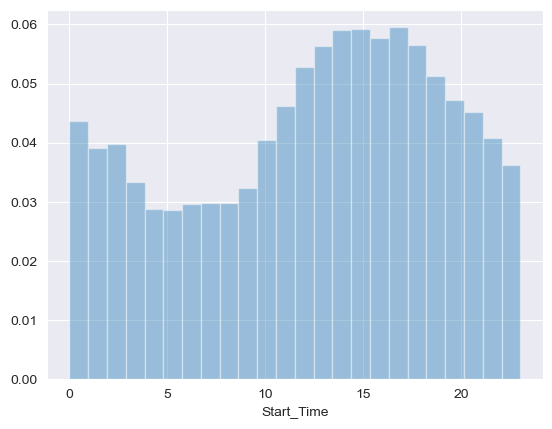

In [48]:
sundays_start_time = df.Start_Time[df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins = 24, kde=False, norm_hist=True)

While Monday follows the general 24-hour pattern- two peaks coinciding with work rush; the distribution for Sunday sees a peak between 10 am and 2 pm. This could be due to people going out for leisurely activities on Sundays.

# Temperature
This column recorded temperature at the time of the accident in degrees Fahrenheit.

In [49]:
#pull out the column with its frequency disribution
df['Temperature(F)'].value_counts()

 73.0     64505
 77.0     63575
 75.0     60534
 72.0     59681
 68.0     58557
          ...  
 109.8        1
-9.8          1
 170.6        1
 107.2        1
 99.1         1
Name: Temperature(F), Length: 788, dtype: int64

<Axes: >

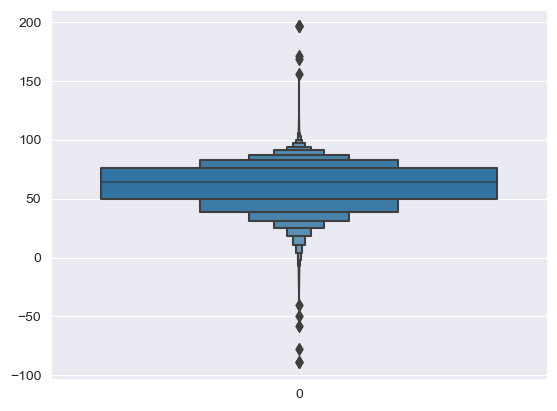

In [50]:
sns.boxenplot(df['Temperature(F)'])

So, a chunk of the accidents happens to be in areas experiencing temperatures in the range of (50–60) degrees Fahrenheit. Most accidents occur in colder weather or regions.

# Weather Condition
This column has the description of the weather condition at the time of the accident, such as, “Fair”, “Cloudy”, “Clear” etc.

In [51]:
df.Weather_Condition.value_counts()

Fair                        1107194
Mostly Cloudy                363959
Cloudy                       348767
Partly Cloudy                249939
Clear                        173823
                             ...   
Sleet / Windy                     1
Mist / Windy                      1
Blowing Sand                      1
Heavy Freezing Rain               1
Thunder and Hail / Windy          1
Name: Weather_Condition, Length: 127, dtype: int64

In [ ]:
pip install wordcloud

In [60]:
#importing the required packages
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

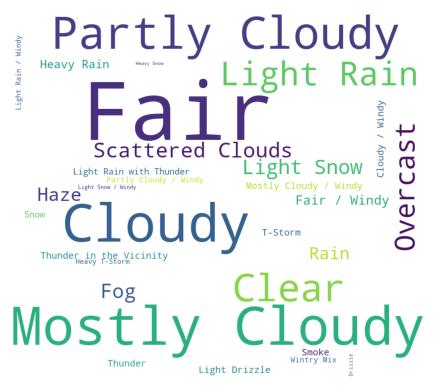

In [61]:
data = df['Weather_Condition'].value_counts().to_dict()
wc = WordCloud(width = 900, height = 800,
background_color ='white',
min_font_size = 10).generate_from_frequencies(data)
plt.imshow(wc)
plt.axis('off')
plt.show()

The most frequently used word is “Fair”, followed by “Clear” and “Mostly Cloudy”. Now, the question arises that how did most of the recorded accidents occur under such weather conditions?

# Crossing
The column records the presence of a crossing nearby at the point of the accident. “True” and “False” values is best visualized in a pie-chart-

<Axes: ylabel='Crossing'>

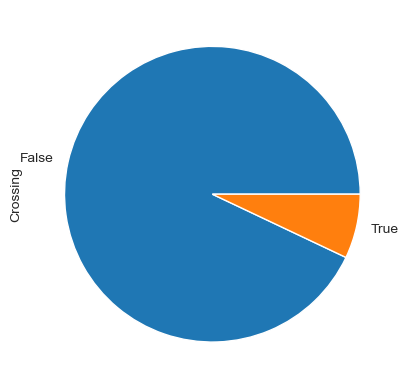

In [62]:
df['Crossing'].value_counts().plot(kind= 'pie')

The accidents mostly happened away from a crossing. This brings to the query of proper signaling systems in these areas.

# Traffic SIgnal
A binary column indicating the presence of a traffic signal nearby the spot of the accident.

<Axes: ylabel='Traffic_Signal'>

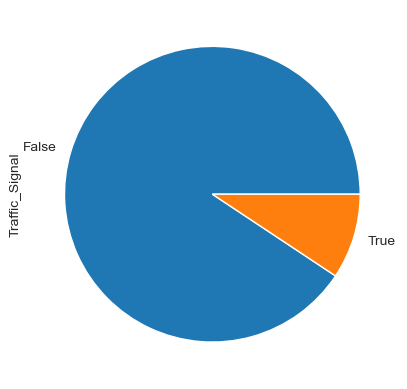

In [63]:
df['Traffic_Signal'].value_counts().plot(kind='pie')

Clearly, poor traffic management is a cause for the chunk of the accidents.

# Bump
A binary column indicating the presence of a speed bump nearby the spot of the accident.

<Axes: ylabel='Bump'>

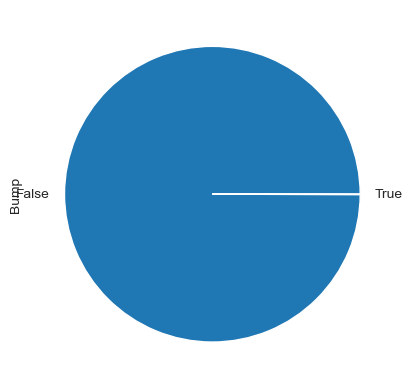

In [66]:
df['Bump'].value_counts().plot(kind='pie')

Speed control mechanisms are inadequate in the recorded accidents.

In conclusion, it can be said that while the percentage of accidents is low for most cities, it is important to hammer the point that this analysis points to the following-

The majority of such accidents seemed to have happened due to the absence of proper traffic management mechanisms like traffic signals and bumps- particularly in areas away from the main crossings.